In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from lane_finder.lane_detector import LaneDetector

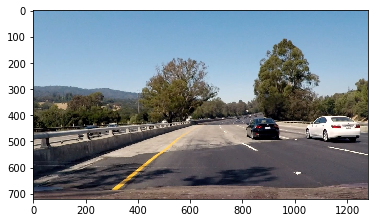

In [2]:
test_road_img = mpimg.imread('./test_images/test4.jpg')
plt.imshow(test_road_img)

#### Create a LaneDetector instance

In [3]:
detector = LaneDetector()

#### Show camera calibration images

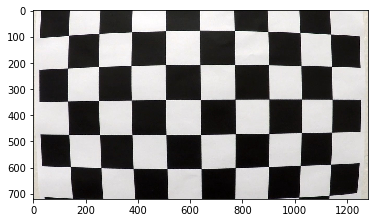

In [4]:
img = mpimg.imread('./camera_cal/calibration1.jpg')
plt.imshow(img)

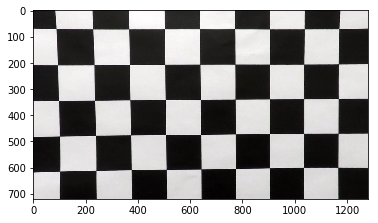

In [5]:
plt.imshow(detector.camera.correct_distortion(img))


#### Call single lane detection pipeline method on the road image

In [6]:
detector.detect_lane(test_road_img);

#### Access various intermediate pipeline stage images and attributes for study

In [7]:
combined = detector.binary_thresholder.combined
combined.shape

(720, 1280)

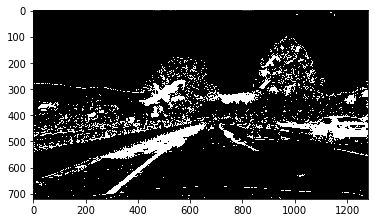

In [8]:
plt.imshow(combined, 'gray')

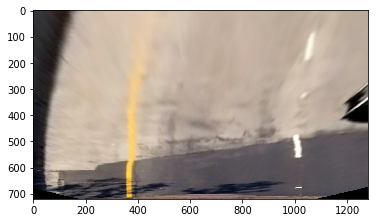

In [9]:
plt.imshow(detector.warped_corrected)

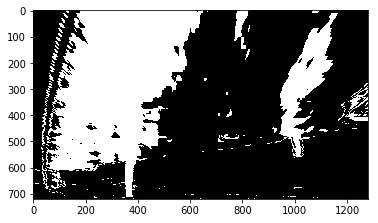

In [10]:
warped = detector.perspective_transformer.warped
plt.imshow(warped, 'gray')

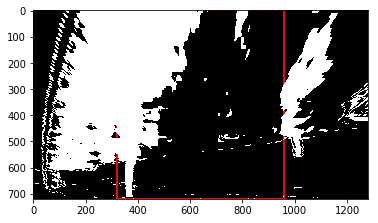

In [11]:
detector.visualizer.draw_polygon(detector.perspective_transformer.warped,
                                 detector.perspective_transformer.dst_default)
plt.imshow(detector.visualizer.visualized, 'gray')

In [12]:
detector.lane_lines.left_fit

array([ 8.77357814e-05, -2.46612989e-02,  3.31604395e+02])

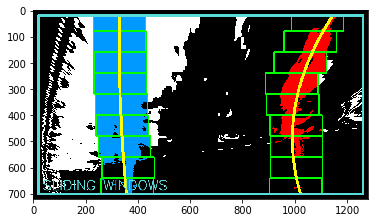

In [13]:
plt.imshow(detector.visualizer.detected_lane_lines_warped)

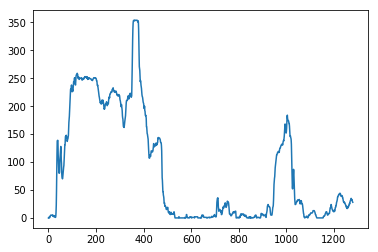

In [14]:
plt.plot(detector.lane_lines.histogram_freqs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


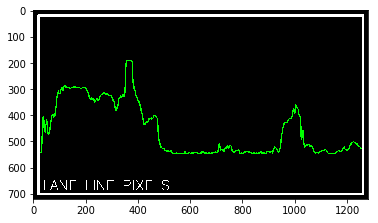

In [15]:
plt.imshow(detector.visualizer.lane_lines_histogram)

In [16]:
detector.lane_curve_rads

[1872.2984977762214, 235.17667486189782]

In [17]:
detector.lane_lines.histogram_freqs.shape

(1280,)

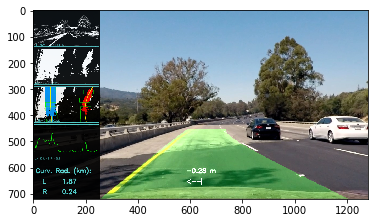

In [18]:
plt.imshow(detector.result)

In [19]:
detector.visualizer.save_image(detector.result, "lane_marked.jpg")

Saving lane_marked.jpg


### Run video clip through refactored pipeline

In [20]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [21]:
ln_dtr = LaneDetector()

project_output = './output_videos/refactored_output.mp4'

clip1 = VideoFileClip("./test_videos/project_video.mp4")
proj_clip = clip1.fl_image(ln_dtr.detect_lane)
%time proj_clip.write_videofile(project_output, audio=False)

t:   0%|          | 2/1260 [00:00<01:40, 12.47it/s, now=None]

Moviepy - Building video ./output_videos/refactored_output.mp4.
Moviepy - Writing video ./output_videos/refactored_output.mp4



Moviepy - Done !
Moviepy - video ready ./output_videos/refactored_output.mp4
CPU times: user 43min 1s, sys: 3.54 s, total: 43min 5s
Wall time: 3min 46s


In [22]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('./output_videos/refactored_output.mp4'))

In [23]:
project_output2 = './output_videos/refactored_challenge_output.mp4'

clip2 = VideoFileClip("./test_videos/challenge_video.mp4")
proj_clip = clip2.fl_image(ln_dtr.detect_lane)
%time proj_clip.write_videofile(project_output2, audio=False)

t:   0%|          | 2/485 [00:00<00:37, 12.89it/s, now=None]

Moviepy - Building video ./output_videos/refactored_challenge_output.mp4.
Moviepy - Writing video ./output_videos/refactored_challenge_output.mp4



Moviepy - Done !
Moviepy - video ready ./output_videos/refactored_challenge_output.mp4
CPU times: user 16min 41s, sys: 1.49 s, total: 16min 43s
Wall time: 1min 28s


In [24]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('./output_videos/refactored_challenge_output.mp4'))